# Test the VAE models

In [1]:
import numpy as np
from src.model import genModel
from src.vaeHelpers import *

%matplotlib inline

Using TensorFlow backend.


## Load cat/dog models

In [5]:
valCats = readSavedFiles( "valCats.txt" )
valDogs = readSavedFiles( "valDogs.txt" )

encCat, decCat, catVAE = genModel()
encDog, decDog, dogVAE = genModel()

catVAE.load_weights( "weights/catGen.hdf5" )
dogVAE.load_weights( "weights/dogGen.hdf5" )

codeSize = 2048
imgSize = 256

## Generate some cats

		Generated:


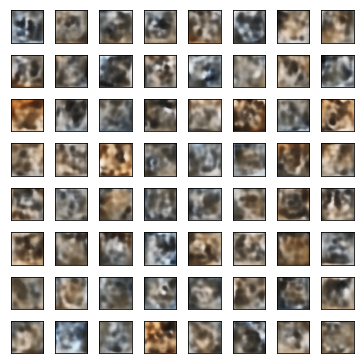

In [6]:
codes = np.random.normal( size = (64, codeSize) )
cats = decCat.predict( codes )

print( "\t\tGenerated:" )
plotGrid( cats, "", (5, 5) )

## Inspect cat reconstructions


		Original:


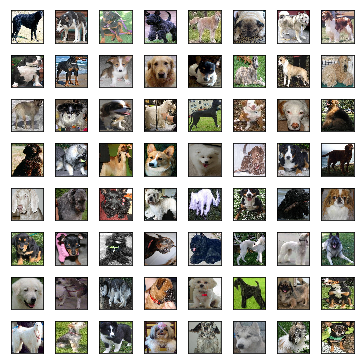


		Reconstruction:


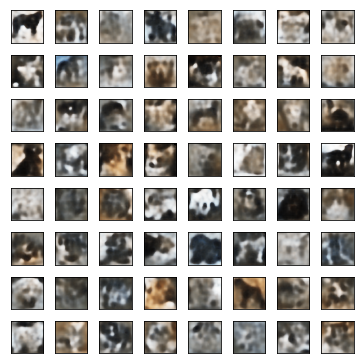

In [7]:
catSample, _ = next( genBatch( valCats, 64, imgSize, False ) )

recon = catVAE.predict( catSample )

print( "\n\t\tOriginal:" )
plotGrid( catSample, "", size = (5, 5) )

print( "\n\t\tReconstruction:" )
plotGrid( recon, "", size = (5, 5) )

## Generate some dogs

		Generated:


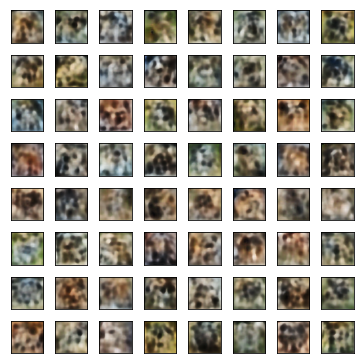

In [8]:
codes = np.random.normal( size = (64, codeSize) )
dogs = decDog.predict( codes )

print( "\t\tGenerated:" )
plotGrid( dogs, "", (5, 5) )

## Inspect dog reconstructions


		Original:


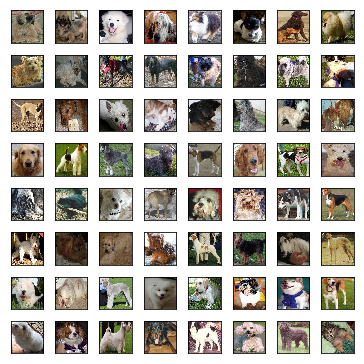


		Reconstruction:


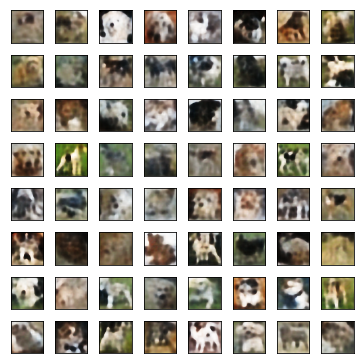

In [9]:
dogSample, _ = next( genBatch( valDogs, 64, imgSize, False ) )

recon = dogVAE.predict( dogSample )

print( "\n\t\tOriginal:" )
plotGrid( dogSample, "", size = (5, 5) )

print( "\n\t\tReconstruction:" )
plotGrid( recon, "", size = (5, 5) )